# Assignment 3: Reinforcement Learning

**Goal**: Get familiar with a reinforcement learning approach to solve multi-armed bandit problem.

We will implement a value-based reinforcement learning approach with two
algorithm variations: epsilon-greedy (e-greedy) and upper confidence bound
(UCB) algorithms and perform an analysis on their behavior.

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

* Plagiarism is automatically checked and set to **0 points**

* It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

* Use of generative AI to answer **ANY** part of the assignment is
**strictly prohibited**, if any part of the assignment is found to be
answered using generative AI, the question will be awarded **0 points**.

## 1. Introduction: Multi-Armed Bandit Problem

Imagine you are in a casino facing a row of slot machines, say there are 20 of them. Each slot machine is providing reward based on a certain probability distribution that is unknown to you.

This is your first time in this casino, thus you have no idea what to do next. You have just enough money to play for 100 times and each of these times, you can pick any machine you want and after "pulling"

What would you do?

The overall goal would of course be to find out the one that is providing the most reward, right? What should your algorithm be to get the most reward at the end?

## 2. Implementation

In [46]:
%pip install 'matplotlib>=3.7' 'numpy>=1.25' 'tqdm>=4.65' --upgrade

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'matplotlib"


In [47]:
# First import the dependencies
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange

**Question 1 (0-0.25-0.5pt):** Please write down mathematical expressions arm selection for the e-greedy and UCB algorithms and discuss their parameters.

**Answer:** 

**E-greedy algorithm**

a_t = {argmax(Q_t(a)) if (rand < (1 - 𝜖)); rand(a) otherwise}

Here: 
- a_t is the action (arm) at a timestep or iteration t.
- Q_t(a) is the estimated reward of a at timestep t, which is picked with a probability of (1 - 𝜖). We will update the Q value for each step based on the rewards received from the action, where Q_(k+1) = Q_k + α * [ R_k - Q_k ]. Since we would like to maximise the reward, we take argmax(Q_t(a)).
- 𝜖 is the epsilon, a hyperparameter for exploration rate. It is set to balance between exploration and explotation. The higher the epsilon, the more we explore.
- α is a hyperparameter for learning rate. Used to update the estimate values. It decides how much to change the new estimate based on the experience before. The higher the learning rate, the more 'weight' is assigned to new information.
- R is the reward that one got from the action
- rand is just a randomly generated value
- rand(a) is a random action that is picked with the probability of epsilon. This parameter allows to explore more. 


**UCB algorithm**

a_t = argmax(Q_t(a) + C * sqrt(ln(t)/N_t(a)))

Here:
- a_t is the action (arm) at timestep or iteration t.
- Q_t(a) is the estimated reward of a at timestep t
- C is the hyperparameter responsible for exploration also could be interpreted as a determinator for the level of uncertainty. The higher C, the more we explore. 
- N_t(a) number of times arm a has been picked at timestep t.

Overall, this algorihtm has two parts: the exploitation or the known information- estimated reward Q(a) and exploration part- explores actions with uncertain rewards based on the number of times they have been selected.


**Task 1 (3 pt):** Please implement the e-greedy and UCB algorithms in the code given below.

In [48]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.75 pts if the code works but some functions are incorrect and it is badly explained
# 1.5 pts if the code works but some functions are incorrect but it is explained well
# 2.25 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 3 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


# ============ PLEASE DO NOT CHANGE ============ #


def initialize(n_arms):
    rng = np.random.default_rng()
    R = rng.uniform(low=0.45, high=0.55, size=n_arms)
    R[rng.integers(n_arms)] = 0.9
    # return actual mean of the reward probabilities
    return R

# ================================================ #


# the epsilon-greedy algorithm
def e_greedy(Q, epsilon, selection_counter = None, t = None):
    ########### PLEASE FILL IN ##############

    #compare a random value to (1-epsilon)
    if np.random.rand() < (1 - epsilon):
        #if it is smaller, select the maximal from Q
        selection = np.argmax(Q)
    else:
        #else: select a random value from other possible values
        selection = np.random.choice(len(Q))

    ######################################
    return selection


# The upper confidence bound algorithm
def UCB(Q, selection_counter, t, epsilon = None):
    C = 0.5
    ########### PLEASE FILL IN ##############

    #select the maximal from the equation defined before
    #the +1 ensures non-zero values (it can also be removed and algorithm still works, however, this prevents possible numerical issues)
    selection = np.argmax(Q + C * np.sqrt(np.log(t+1)/(selection_counter+1))) #in numpy log is ln, so it matches
  
    #########################################
    return selection


def MAB(
    trials,  # total number of arm pulls
    n_arms,  # number of arms to pull
    epsilon,  # exploration parameter for the epsilon-greedy algorithm
    alpha,  # learning rate for updating Q-values
    init,  # initial starting value of the Q-values
    algorithm,  # the type of update: e_greedy or UCB
):
    # ============ PLEASE DO NOT CHANGE ============ #
    # initialization of the reward distributions unknown to the player
    R = initialize(n_arms)
    cumulative_reward_trend = np.zeros(trials)
    selection_trend = np.zeros(trials)
    reward_trend = np.zeros(trials)
    cumulative_reward = 0
    
    #initialize counter of selection for each arms
    selection_counter = np.zeros(n_arms)

    # initialize initial estimates of rewards
    Q = np.ones(n_arms) * init
    # ================================================ #

    for i in trange(trials, leave=False):
        # ============ PLEASE DO NOT CHANGE ============ #
        # select an arm to pull based on reward estimates and other
        kwargs = {
            "Q": Q,
            "epsilon": epsilon,
            "selection_counter": selection_counter,
            "t": i,
        }
        selection = algorithm(**kwargs)
        reward = np.random.normal(R[selection], 0.01)
        # ================================================ #

        ########### PLEASE FILL IN ##############
        # Update Q values
        Q[selection] += alpha * (reward - Q[selection])
        ########################################

        # ============ PLEASE DO NOT CHANGE ============ #
        reward_trend[i]  = reward
        selection_trend[i] = selection
        selection_counter[selection] += 1
        cumulative_reward += reward
        cumulative_reward_trend[i] = cumulative_reward
        # ================================================ #

    return reward_trend

**Question 2 (0-0.25-0.5pt):** Please explain the concept of exploration and exploitation in the context epsilon-greedy and UCB algorithm contexts.
How does the epsilon-greedy algorithm balance exploration and exploitation?


**Answer:** 
The overall idea of the exploration and exploitation concept is to find tradeoff between both- exploration (trying new actions to get more information about their rewards and possibly find higher reward) and exploitation (staying with the already known actions that are believed to be optimal)
- In the context of epsilon-greedy algorithm- the balance is achieved with the hyperparameter 𝜖 (epsilon). The algorithm suggests that exploitation is achieved with the probability of (1-𝜖) and exploration is achieved if the probability of 𝜖. Therefore, the higher epsilon, the more we explore. To explore would mean to try random arms not taking into account their esimated rewards. This gives a possibility to find other arms that might lead to higher rewards. And if we want to achieve a higher exploitation, epsilon value should be decreased. Exploitation in this case is selecting the arm with the highest estimated (believed) reward. The balance between both is acheieved by selecting an optimal epsilon value, which can depend on, for example, the environment or given task.
- In the context of UCB algorithm- exploration and exploitation tradeoff is done by adjusting the hyperparameter C. For exploitation, C should be decreased. This will select the current best estimates to maximise the reward at that timestep. This would mean to select the arms we believe are the best from what we already know. To explore more, the C value can be increased. This will allow to explore actions with uncertain rewards. In addition, the tradeoff is done by taking into account the time an action is selected. Meaning that if the arm is already explored, it would not make sense to explore that arm.

---

## 3. Algorithm Analysis

In [49]:
# ============ PLEASE DO NOT REMOVE ============ #
def plot_experiments(experiment1, experiment2, labels):

    experiment1 = np.array(experiment1)
    experiment1_std = np.std(experiment1, axis=0)
    experiment1_mean = np.mean(experiment1, axis=0)

    experiment2 = np.array(experiment2)
    experiment2_std = np.std(experiment2, axis=0)
    experiment2_mean = np.mean(experiment2, axis=0)

    mean = [experiment1_mean, experiment2_mean]
    std = [experiment1_std, experiment2_std]
    
   
    plt.figure(figsize=(12,6))
    y_values = np.arange(0, len(mean[0]))
    for i in range(len(mean)):
        plt.plot(y_values, mean[i], label=labels[i])
        plt.fill_between(y_values, mean[i] + std[i], mean[i] - std[i], alpha=0.2)
    
    plt.xlabel("Arm pulls (trials)")
    plt.ylabel("Average reward of 20 runs")
    
    plt.legend()

# ================================================ #

## 2. Comparison of e-greedy and UCB algorithms

Running the code below will launch all the experiments that we would like to plot and perform analysis on.

In [50]:
experiment1 = []  # epsilon greedy epsilon: 0.1 initial Q: 0
experiment2 = []  # epsilon greedy epsilon: 0.1 initial Q: 1
experiment3 = []  # epsilon greedy epsilon: 0.2 initial Q: 0

experiment4 = []  # UCB initial Q: 0
experiment5 = []  # UCB initial Q: 1

for _ in trange(20):
    experiment1.append(MAB(5_000, 20, 0.1, 0.1, 0, e_greedy))
    experiment2.append(MAB(5_000, 20, 0.1, 0.1, 1, e_greedy))
    experiment3.append(MAB(5_000, 20, 0.1, 0.2, 0, e_greedy))

    experiment4.append(MAB(5_000, 20, 0.1, 0.1, 0, UCB))
    experiment5.append(MAB(5_000, 20, 0.1, 0.1, 1, UCB))

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

---
**Question 3 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy and UCB algorithms for initial Q: 0 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** 
In all questions the results were divided into 3 phases each based on a different period of the process
- initial phase
- middle phase
- later phase

1. Initial phase (0-1000 trials)
At the very beggining both of the algorithms start at the same level Q=0. The start process is only the exploration of rewards. However, already approximately at the first trials the UCB algorithm outperforms the e-greedy algorithm and has much higher avg reward. After this fast increase, the UCB algorithm keeps a steady line, so it does not change much and therefore, the exploitation part is happening at reward of 0.9. After, the avg value drops to 0.7 but then goes back to 0.9. The avg values of the e-greedy algorithm are slowly increasing through the whole initial phase and reach only approximately 0.55. In this phase, the UCB algorithm did better since it had a better exploration/exploitation tradeoff achieved by the confidence bound.
2. Middle phase (1000-4000 trials)
The e-greedy algorithm is slowly increasing until approximately 2800 trials, reaching 0.91 at most, which is at the level where UCB already is exploting. However, it has much exploration involved, so the line is fluctuating and different values from 0.75 to 0.91 are achieved at each trial from 2800 trials onwards. In contrast, the UCB algorithm is much more steady, with a little exception from timestep 1400 until 2300. This exploration is small and the values change between 0.85 to 0.9. In this phase, still the UCB algorithm was overall better and more precise because the e-greedy algorithm took more trials to find an optimal value and had too much of exploration when it was found.
3. Later phase (4000-5000 trials)
Finally, the e-greedy algorithm showed the same performance as from the 2800 trail timestamp- not overall increasing the best values found but flactuating and exploring quite a lot. The UCB algorithm was exploiting the best values found. Again, UCB was better for the same reasons mentioned.

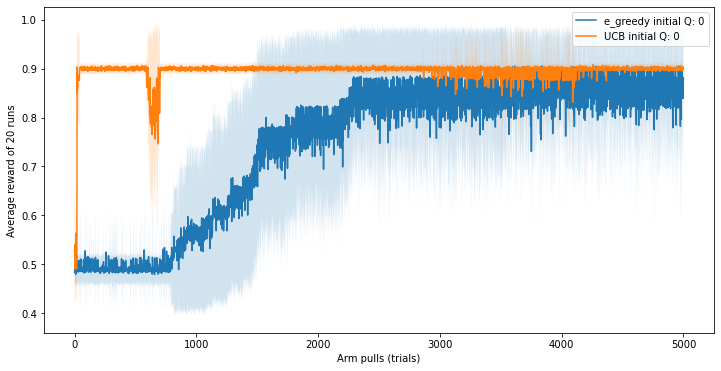

In [51]:
label = ["e_greedy initial Q: 0", "UCB initial Q: 0"]
plot_experiments(
    ########### PLEASE FILL IN ##############
   
    experiment1,
    experiment4,
    ########################################
    label,
)

---
**Question 4 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy and UCB algorithms for initial Q: 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** 

1. Initial phase (0-1000 trials)
Both the e-greedy and UCB algorithms start at the highest Q=1. Then when the trials go on, at first both algorithms decrease the rewards to as low rewards as 0.5. Furthermore, the UCB algorithm was able to gradualy identify the better reward that becomes stable at a high level of 0.85-0.9. The e-greedy improved more quickly than UCB and reached an optimal level of reward of 0.8-0.9. It is hard to estimate which algorithm is better at this phase because the UCB algorithm took more time to find the optimal values but is acheiving less fluctuating rewards at the end of the phase, while the e-greedy algorithm found optimal values faster but has higher variance, so it could be considered as better.
2. Middle phase (1000-4000 trials)
During this phase, the UCB algorithm continues with a high and steady reward of 0.85-0.9, meaning that it allows exploitation. The e-greedy algorithm is not as steady and is performing worse than UCB algorithm (0.75-0.9) that is due to lack of exploitation and higher epsilon hyperparameter.
3. Later phase (4000-5000 trials)
In this phase, the performance is not changing a lot. The e-greedy algorithm is flactuating between 0.75 and 0.9, while the UCB is even more steady and better than before and confidentaly demonstrates results from 0.87 to 0.9.

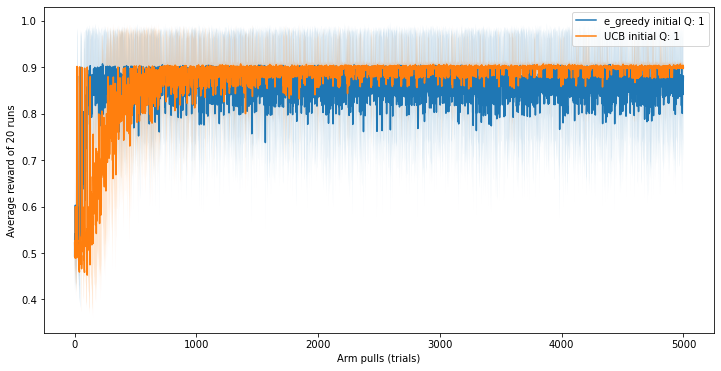

In [52]:
label = ["e_greedy initial Q: 1", "UCB initial Q: 1"]
plot_experiments(
    ########### PLEASE FILL IN ##############

    experiment2,
    experiment5,

    ########################################
    label,
)

---
**Question 5 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy for initial Q: 0 for epsilon values 0.1 and 0.2 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:**
1. Initial phase (0-1000 trials)
The e-greedy algorithm with ε = 0.1 starts to increase but is outperformed by the e-greedy algorithm with ε = 0.2, which demonstrates a faster increase. During this phase, the higher exploration rate of the epsilon = 0.2 algorithm allows it to explore more options (which is very neccassary in the beggining) and thus find more rewarding results faster than the epsilon = 0.1 algorithm.
2. Middle phase (1000-4000 trials)
In this phase, the e-greedy with ε = 0.2 continues to maintain a higher average reward compared to the ε = 0.1. However, the difference between their rewards becomes less and less since the ε = 0.1 algorithms reward catches up to the ε = 0.2 award of 0.8-0.9. Since the ε = 0.1 is exploring slower, it takes more trials to follow up with the ε = 0.2 algorithm but eventually they both reach similar avg values. In this phase, ε = 0.2 is better since it was able to find the optimal values faster. 
3. Later phase (4000-5000 trials)
Finally, in this phase, both algorithms perform very similarly. The rewards for both algorithms fluctuate, since this is a greedy algorithm, which allows more exploration. But since smaller epsilon values allow less exploration, the ε = 0.1 algorithm shows a slightly steadier reward towards the last trials. Therefore, the ε = 0.2 algorithm initially lead to finding better options, but over time, the ε = 0.1 algorithm did catch up and demonstrated a similar but a bit better level of performance.

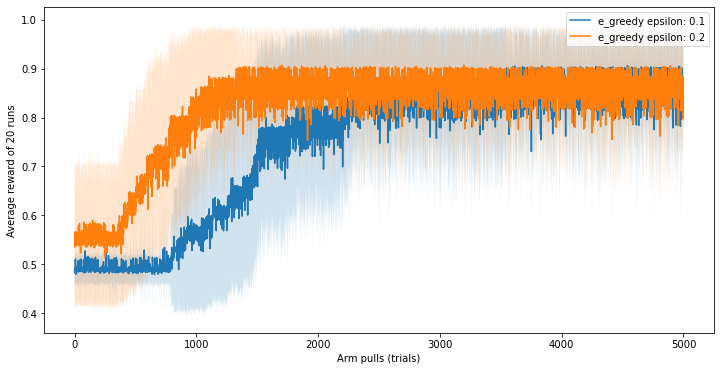

In [53]:
label = ["e_greedy epsilon: 0.1", "e_greedy epsilon: 0.2"]
plot_experiments(
    ########### PLEASE FILL IN ##############

    experiment1,
    experiment3,
    
    ########################################
    label,
)

---
**Question 6 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy for epsilon = 0.1 initial Q: 0 and 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** 
1. Initial phase (0-1000 trials)
The e-greedy with an initial Q=1 value was more quick in achieving a high average reward. From 10th trial on the algorithm was steady and showed a high performance of 0.8-0.9 on avg. The Q=0 algorithm started off with lower rewards and showed a slow gradual increase as seen before and reached only 0.58 value. For early trials, we can conclude that for e-greedy algorithm choosing a higher initial value will lead to more quick acheivement of high reward values.
2. Middle phase (1000-4000 trials)
In this phase, the e-greedy with an initial Q=1 still performed well, with a consistently high average reward of 0.8-0.9. Meanwhile, the e-greedy with an initial Q=0 was improving more quickly comparing to the initial phase. At the 3000th trial it was also able to reach the Q=1 algorithm and was also as steady as Q=1 afterwards. At this phase, the Q=1 was still better on average because the exploration of Q=0 algorithm was too slow (for example, increasing the epsilon ε would help in more exploration) 
3. Later phase (4000-5000 trials)
The average reward for both algorithms are very similar. Both algorithms were not changing from the middle phase. Overall, both algorithms are performing the same but not perfect. At this part of trials, the epsiolon value could be decreased to acheive a more steady result. 

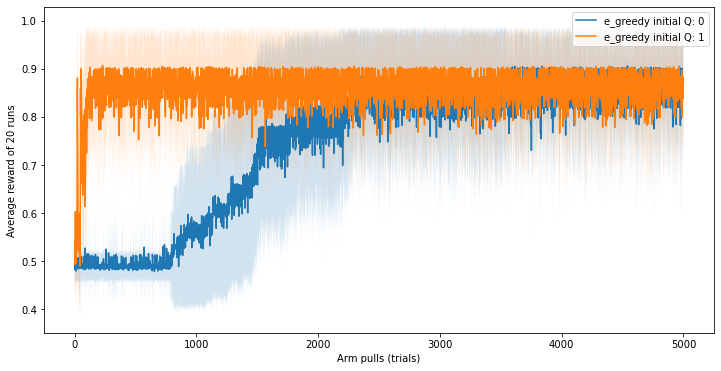

In [54]:
label = ["e_greedy initial Q: 0", "e_greedy initial Q: 1"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    # arg1,
    # arg2,

    experiment1,
    experiment2,

    ########################################
    label,
)

---
**Question 7 (0-0.5-1pt):** Plot and compare the average rewards for UCB initial Q: 0 and 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** 
1. Initial phase (0-1000 trials)
The UCB with an initial Q=1 increases and decreases at each trial for the first 10 trials allowing to explore different arms, but then grows gradually and reaches a high average reward level of 0.9 already by 500 trials, which is done by balancing exploration and exploitation. After, it stabilizes more. Furthermore, the UCB Q=0 algorithm showed a couple of flactuations at first but quicly reached the avg value of 0.9 at 10 trials. After, it was exploiting until 350 trials when a period of exploring other arms was done. After 200 trials, it returned to previously found best value of 0.9 and was steady. In this phase, the Q=0 algorithm performed better since it could more quickly identify the high avg of 0.9.
2. Middle phase (1000-4000 trials)
Throughout the middle part, the UCB with Q=0 continues to maintain a high average reward of 0.85-0.9. The Q=0 algorithm shows confidence in performance, indicating that it's exploiting more than exploring. The Q=1 algorithm is still increasing its performance and becoming more steady and then exploring less. Overall, also in this part the Q=0 algorithm was performing better since it found an optimal solution to exploit already in the initial phase and kept exploiting it.
3. Later phase (4000-5000 trials)
In the final phase, the Q=1 and Q=0 algorithms rewards remain stable, which implies that they are consistently exploiting what they have learned to be the best actions so far. 

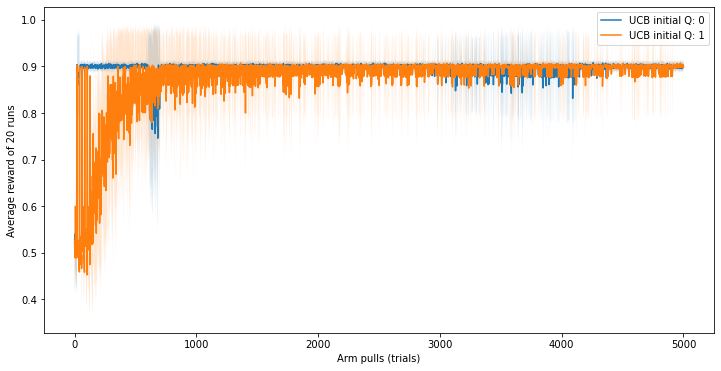

In [55]:
label = ["UCB initial Q: 0", "UCB initial Q: 1"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    # arg1,
    # arg2,
    experiment4,
    experiment5,

    ########################################
    label,
)

---

## 3. Final remarks

**Question 8 (0-0.5-1pt):** Based on the all plots and analysis, please plot the best and worst performing algorithms and discuss the comparison? Discuss why that may be the case.

**Answer:** 

THE BEST ALGORITHM = experiment 4 (UCB initial Q: 0)
This algorithm is selected as the best performing since it quickly idenitfies an optimal solution and keeps exploiting through all trials with doing a bit of exploration to have a balance.

THE WORST ALGORITHM = experiment 1 (epsilon greedy epsilon: 0.1 initial Q: 0)
This algorithm is selected as the worst performing since it slowly grows in avg reward values and after finding an optimal value it has high variance. The exploration and exploitation problem is not balanced throughout the trials.

COMPARISON
The upper confident bound algorithm is more quick and efficient in indentifying the optimal solution. In contrast, the epsilon greedy algorithm fails to balance in exploration in the beggining and exploitation at the end. The UCB algorithm is better because of its confidence bounds. They help to balance exploration and exploitation by taking into account the average reward and the uncertainty in that reward. The start value of Q=0 is efficient since by doing more exploration at first trials, it can quickly find the best reward. The exploration is decreased when the algorithm becomes more certain about the best option. In contrast, the epsilon greedy algorithm as the name suggests is greedy and the epsilon is constant and quite small (so exploration is slow), and therefore, the same rate of exploration is done regardless of rewards. The start value of Q=0 is not the best for greedy algorithms since the grow of avg rewards is slow. To summarize, the UCB algorithm outperforms the e-greedy algorithm by almost perfectly balancing exploration and exploitation. 

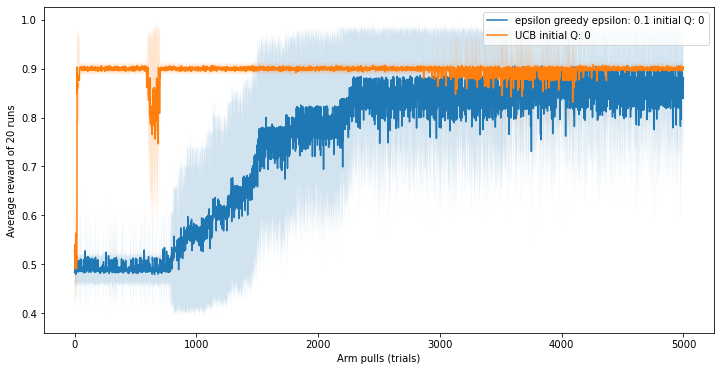

In [56]:
# PLOT THE BEST AND WORST PERFORMING ALGORITHMS AND COMPARE
label = [
    ########### PLEASE FILL IN ##############
    # label_1,
    # label_2,

    "epsilon greedy epsilon: 0.1 initial Q: 0",
    "UCB initial Q: 0"
    ########################################
]
plot_experiments(
    ########### PLEASE FILL IN ##############
    # arg1,
    # arg2,
    experiment1,
    experiment4,
    
    ########################################
    label,
)